In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from datetime import datetime, timedelta
import time
import calendar
import re

In [61]:
from IPython.display import Image
from IPython.core.display import HTML

In [62]:
Image(url= "https://raw.githubusercontent.com/edgar-hdz/workshop/master/start.png",width=600, height=600)

### Example with `selenium`, tool used to interact with websites or webbased applications

#### Before starting, first install the following stuff

!pip install selenium

!apt install chromium-chromedriver

!apt-get update # to update ubuntu to correctly run apt install

!apt install chromium-chromedriver

!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys

sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')



Example, 

In [ ]:
# Copy paste them here below


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException

### Setting up google chrome

In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

### We open the website in a `headless` fashion, meaning that we will not be seing the website

In [ ]:
browser = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
browser.get('http://www.google.com')

In [63]:
Image(url= "https://raw.githubusercontent.com/edgar-hdz/workshop/master/elem.png",width=800, height=600)

We can select the following input item by taking the `name` from the xpath as shown on the image

In [ ]:
search = browser.find_element_by_name('q')

By doing so, we have created a link between this variable and the website, and now we can start interacting with it!

In [ ]:
search.send_keys("mexico to zurich 18 december") ## What to search in google
search.send_keys(Keys.RETURN) # hit return after you enter search text
print("Done")

In [ ]:
el = browser.find_element_by_xpath("//div[@id='rso']/div[2]")
print("Extracted text: {}".format(el.text))

Extract one word of interest using regex, for this example lets say we want the first quantity which is followed by a dollar sign $

In [ ]:
example_regx = el.text
re.search(r'[$]\w.{1,4}', example_regx).group(0)

____________
## Nasdaq example using `Requests`

1. Request data using NASDAQ api
2. Define some functions to process the data
3. Save it into an excel/DB
4. Plot the data out

We have the following `api's`, one containing historical data and the second containing real time data

In [13]:
urls = {
    'chart': "https://api.nasdaq.com/api/quote/AMZN/chart?assetclass=stocks",
    'info': 'https://api.nasdaq.com/api/quote/AMZN/info?assetclass=stocks'
}

We call the `api` using `requests` and the `get` method. We then proceed to parse the data into a json format

In [14]:
data = requests.get(urls['chart']).json()

In [32]:
# Plot data
data

{'data': {'symbol': 'AMZN',
  'company': 'Amazon.com, Inc. Common Stock',
  'timeAsOf': 'Jun 30, 2020 8:48 AM ET',
  'isNasdaq100': True,
  'lastSalePrice': '$2686.99',
  'netChange': '+6.61',
  'percentageChange': '0.25%',
  'deltaIndicator': 'up',
  'previousClose': '$2680.38',
  'chart': [{'z': {'dateTime': '08:48:52 AM', 'value': '2686.99'},
    'x': 1593506932000,
    'y': 2686.99},
   {'z': {'dateTime': '08:47:51 AM', 'value': '2686.89'},
    'x': 1593506871000,
    'y': 2686.89},
   {'z': {'dateTime': '08:46:58 AM', 'value': '2685.51'},
    'x': 1593506818000,
    'y': 2685.51},
   {'z': {'dateTime': '08:45:55 AM', 'value': '2684.21'},
    'x': 1593506755000,
    'y': 2684.21},
   {'z': {'dateTime': '08:44:56 AM', 'value': '2685.00'},
    'x': 1593506696000,
    'y': 2685.0},
   {'z': {'dateTime': '08:43:39 AM', 'value': '2685.00'},
    'x': 1593506619000,
    'y': 2685.0},
   {'z': {'dateTime': '08:42:41 AM', 'value': '2684.00'},
    'x': 1593506561000,
    'y': 2684.0},
   {'z

In [17]:
all_data = []
for item in data['data']['chart']:
    ts = item.get('x', 0)
    value = item.get('y', 0)
    all_data.append((ts, value))
    
# Put everything  into a dataframe
df = pd.DataFrame(all_data, columns=['timestamp', 'value'])

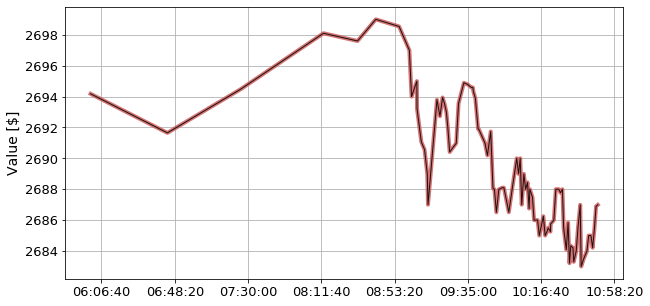

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df.timestamp, df.value, linewidth=4, alpha=0.85, color='indianred')
ax.plot(df.timestamp, df.value, linewidth=1, alpha=0.85, color='black')
ax.grid(True)
dates = [datetime.fromtimestamp(x/1000) for x in ax.get_xticks()]
dates = [datetime.strftime(x, '%H:%M:%S') for x in dates]
ax.set_ylabel('Value [$]', fontsize=14)
ax.tick_params(axis='both', labelsize=13)
ax.set_xticklabels(dates)
plt.show()

The second url `info` is the api call for real time data of the selected stock. If we call the API we get the following response

In [37]:
res = requests.get(urls['info']).json()

In [38]:
res

{'data': {'symbol': 'AMZN',
  'companyName': 'Amazon.com, Inc. Common Stock',
  'stockType': 'Common Stock',
  'exchange': 'NASDAQ-GS',
  'isNasdaqListed': True,
  'isNasdaq100': False,
  'isHeld': False,
  'primaryData': {'lastSalePrice': '$2688.25',
   'netChange': '7.87',
   'percentageChange': '0.29%',
   'deltaIndicator': 'up',
   'lastTradeTimestamp': 'DATA AS OF Jun 30, 2020 9:00 AM ET - PRE-MARKET',
   'isRealTime': True},
  'secondaryData': {'lastSalePrice': '$2680.38',
   'netChange': '12.49',
   'percentageChange': '0.46%',
   'deltaIndicator': 'down',
   'lastTradeTimestamp': 'CLOSED AT 4:00 PM ET ON Jun 29, 2020',
   'isRealTime': False},
  'keyStats': {'Volume': {'label': 'Volume', 'value': '5,029'},
   'PreviousClose': {'label': 'Previous Close', 'value': '$2,680.38'},
   'OpenPrice': {'label': 'Open', 'value': '$2,690.00'},
   'MarketCap': {'label': 'Market Cap', 'value': '1,336,909,300,652'}},
  'marketStatus': 'Pre Market',
  'assetClass': 'STOCKS'},
 'message': None,

______
Which contains information from the time in which we run the query. If we would like to make this step more efficient, we could do the following and define a function to query the data for us

In [48]:
def get_data_stock(item):
    """
    Get data from stock item
   
    :param item: http response -> dictionary
    :return: tupple containing data of interest
    """
   
    primary_data = ['lastSalePrice', 'netChange', 'percentageChange', 'deltaIndicator']
    other_cols = ['symbol', 'volume', 'timestamp']
    column_names = primary_data + other_cols
    try:
        symbol = item.get('symbol')
        volume = item.get('keyStats').get('Volume').get('value')
        prim_data = [item.get('primaryData').get(x) for x in primary_data]
        timestamp = datetime.now().timestamp()
       
        prim_data.append(symbol)
        prim_data.append(volume)
        prim_data.append(timestamp)
        
        df = pd.DataFrame([prim_data], columns=column_names)
        df['lastSalePrice'] = float(df['lastSalePrice'].values[0].replace('$', ''))

        
        return df
   
    except Exception as e:
        print(str(e))
        return pd.DataFrame() 

Using this function with our requested data

In [50]:
df = get_data_stock(res['data'])
df

,lastSalePrice,netChange,percentageChange,deltaIndicator,symbol,volume,timestamp
0,2688.25,7.87,0.29%,up,AMZN,"5,029",1.593523e+09


Making a secondary function which will doing the query provided the url, and update the `DataFrame`

In [51]:
def do_query(url):
   
    global df
   
    """
    Does a query to url
   
    :param url: url to do http request to NASDAQ
    """
    res = requests.get(url).json()
    df_temp = get_data_stock(res['data'])
    df = pd.concat([df, df_temp]).sort_values(by='timestamp').reset_index().drop(columns='index')

    return df

Running `do_query()` and plotting the graph

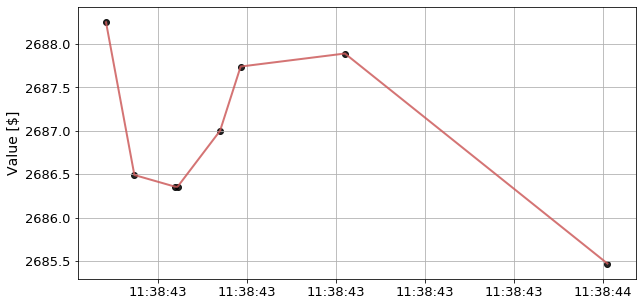

In [64]:
do_query(urls['info'])
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(df.timestamp, df.lastSalePrice, linewidth=2, alpha=0.85, color='indianred')
ax.scatter(df.timestamp, df.lastSalePrice, linewidth=1, alpha=0.85, color='black')
ax.grid(True)
dates = [datetime.fromtimestamp(x/1000) for x in ax.get_xticks()]
dates = [datetime.strftime(x, '%H:%M:%S') for x in dates]
ax.set_ylabel('Value [$]', fontsize=14)
ax.tick_params(axis='both', labelsize=13)
ax.set_xticklabels(dates)
plt.show()